# TinyML - Random Forest (Classifier)

In [1]:
#!pip install micromlgen

## 1. Importing libraries

In [2]:
from micromlgen import port

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz

from six import StringIO
from IPython.display import Image  
import pydotplus

## 2. Load Dataset

The Iris dataset is a classic dataset in the field of machine learning and statistics. It was introduced by Sir Ronald A. Fisher in 1936 as an example of discriminant analysis. The dataset is often used for educational purposes and is a common starting point for the practice of pattern classification.


Attributes:

- Sepal length (in centimeters)

- Sepal width (in centimeters)

- Petal length (in centimeters)

- Petal width (in centimeters)

Species:

- 0 - Setosa

- 1 - Versicolor

- 2 - Virginica

In [3]:
X, y = load_iris(return_X_y=True)

In [4]:
print('Input shape: ', X.shape)
print('Target variable shape: ', y.shape)

Input shape:  (150, 4)
Target variable shape:  (150,)


In [5]:
print(X[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [6]:
print(y[:80])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1]


## 3. Split into training and test data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

## 4. Create the classification model

In [8]:
model = RandomForestClassifier(n_estimators = 100, criterion= 'gini', max_depth=2, random_state=0, bootstrap=True, oob_score=True)

## 5. Train the model

In [9]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, oob_score=True, random_state=0)

## 6. Visualization of a single random forest tree

In [10]:
n_estimators = len(model.estimators_)
print('n_estimators: ', n_estimators)

n_estimators:  100


In [11]:
estimator = 1 # Extract single tree
estimator = model.estimators_[estimator]

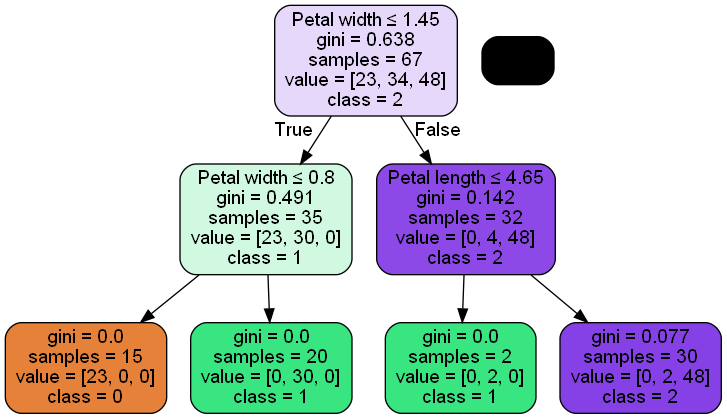

In [12]:
feature_cols = ["Sepal length", "Sepal width", "Petal length", "Petal width"]
dot_data = StringIO()
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('random_forest_classifier.png')
Image(graph.create_png())


## 7 Evaluating the model with the training data

In [13]:
training_predict = model.predict(X_train)

In [14]:
print(metrics.classification_report(y_train, training_predict, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        31
           1      0.919     0.919     0.919        37
           2      0.919     0.919     0.919        37

    accuracy                          0.943       105
   macro avg      0.946     0.946     0.946       105
weighted avg      0.943     0.943     0.943       105



In [15]:
print(metrics.confusion_matrix(y_train, training_predict))

[[31  0  0]
 [ 0 34  3]
 [ 0  3 34]]


## 8. Evaluating the model with test data

In [16]:
test_predict = model.predict(X_test)

In [17]:
print(metrics.classification_report(y_test, test_predict, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        19
           1      1.000     1.000     1.000        13
           2      1.000     1.000     1.000        13

    accuracy                          1.000        45
   macro avg      1.000     1.000     1.000        45
weighted avg      1.000     1.000     1.000        45



In [18]:
print(metrics.confusion_matrix(y_test, test_predict))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


## 9. Obtaining the model to be implemented in the microcontroller

In [19]:
print(port(model))

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class RandomForest {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        uint8_t votes[3] = { 0 };
                        // tree #1
                        if (x[3] <= 0.800000011920929) {
                            votes[0] += 1;
                        }

                        else {
                            if (x[2] <= 5.049999952316284) {
                                votes[1] += 1;
                            }

                            else {
                                votes[2] += 1;
                            }
                        }

                        // tree #2
                        if (x[3] <= 1.449999988079071) {
                            if (x[3] <= 0.800000011920929) {
                         

## 10. Saves the template in a .h file

In [20]:
with open('random_forest_classifier.h', 'w') as file:
    file.write(port(model))